In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM

errL = np.load('../Data_cached/Reconstruction_error_GWAKset_L_1.npz')
errH = np.load('../Data_cached/Reconstruction_error_GWAKset_H_1.npz')

In [6]:
errL.keys()

KeysView(NpzFile '../Data_cached/Reconstruction_error_GWAKset_L_1.npz' with keys: noise_train_pattern, noise_train_norm, noise_test_pattern, noise_test_norm, bbh_pattern...)

In [9]:
X_train = np.vstack((errL["noise_train_pattern"], errH["noise_train_pattern"])).T

X_test = np.vstack((errL["noise_test_pattern"], errH["noise_test_pattern"])).T
X_all = np.vstack((X_train, X_test))

mu = np.mean(X_all, axis=0)
sig = np.std(X_all, axis=0)

X_train = (X_train - mu)/sig
X_test = (X_test - mu)/sig
X_all = (X_all-mu)/sig

In [11]:
X_bbh = np.vstack((errL["bbh_pattern"], errH["bbh_pattern"])).T
X_bbh = (X_bbh - mu)/sig

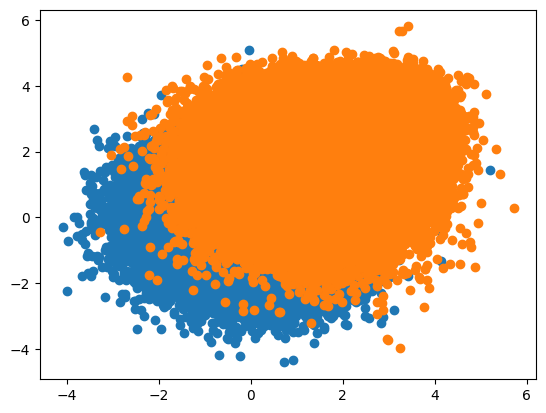

In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_bbh[:, 0], X_bbh[:, 1])

(-3.739732691559289, 7.015264738854596, -4.462507199310544, 6.292490231103342)

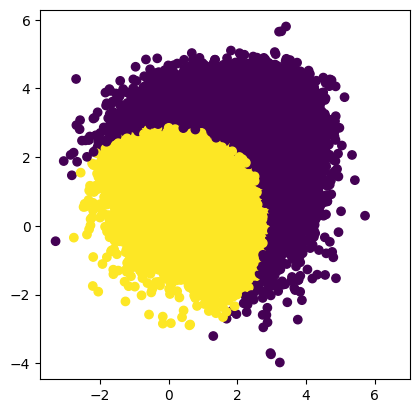

In [13]:
clf = make_pipeline(
            Nystroem(gamma=0.1, n_components=150), # a so-called kernel function that I still haven't figured out it's influence yet
            SGDOneClassSVM(nu=0.01, shuffle=True, fit_intercept=True) # nu is the FPR
)

clf.fit(X_train)

y = clf.predict(X_bbh) # 1 for insider, -1 for outliner

plt.scatter(X_bbh[:, 0], X_bbh[:, 1], c=y)

plt.axis("square")